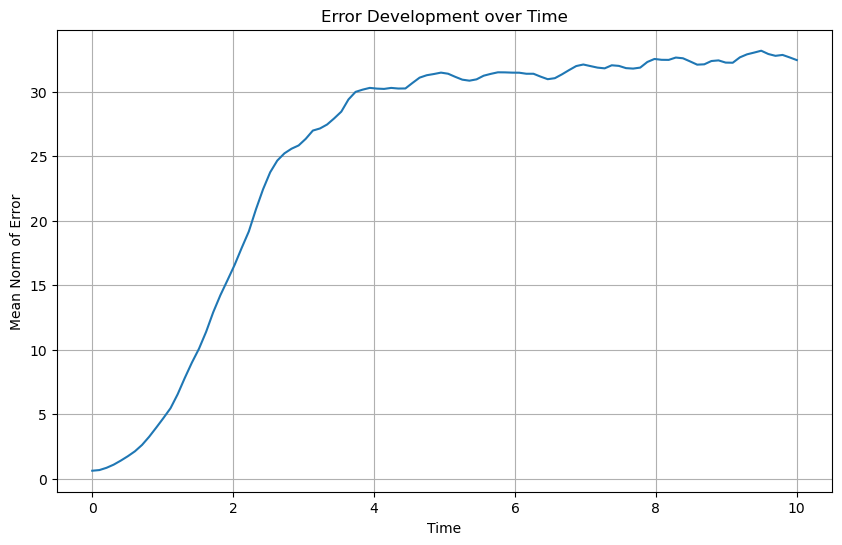

In [56]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Fは外力項
F = 8.0
#Nは解析データの次元
N = 40 #40変数モデル
#dtは時間ステップ幅
dt = 0.01 
#サンプル数
sample = 50
#摂動
epsilon = 0.1

def L96(t,x,F):
    dxdt = np.zeros((N))
    for i in range(2, N-1):
        dxdt[i] = (x[i+1]-x[i-2])*x[i-1] - x[i] + F

    dxdt[0] = (x[1]-x[N-2])*x[N-1] - x[0] + F
    dxdt[1] = (x[2]-x[N-1])*x[0] - x[1] + F
    dxdt[N-1] = (x[0]-x[N-3])*x[N-2] - x[N-1] + F

    return dxdt

#初期条件
X = F + np.random.randn(N)
#十分長い時間(前半半分はアトラクター乗ってないとして切り捨てる)
tspan = [0.0 , int(2.0 * sample)]
t_eval = np.linspace(tspan[0], tspan[1], int(tspan[1] * 100 + 1)) #後で100個間隔で使う
#ODEの解法
sol = solve_ivp(L96, tspan, X, args=(F,), method='RK45', t_eval=t_eval)
error = np.zeros((sample, 100))

#attoractorにはいつから乗るかわからないので半数切り捨てた
for i in range(sample):
    #後半を100個間隔で使う
    #sol.yは N * len(t_eval) の形
    X_attract = sol.y[:, int(len(t_eval) / 2) + 100 * i] 
    #少しずらす
    X_attract_perturb = X_attract + epsilon * np.random.randn(N)
    #摂動を加えた初期条件での積分
    #dense_output=Trueを設定すると、返される解のオブジェクトから、任意の時間点での状態を計算するための補間関数を生成するできる。これにより、t_evalで指定された離散的な時間点以外の時刻における解も求めることが可能。
    sol_attract = solve_ivp(L96, (0, 10), X_attract, args=(F,), method='RK45', dense_output=True)
    sol_attract_perturb = solve_ivp(L96, (0, 10), X_attract_perturb, args=(F,), method='RK45', dense_output=True)
    
    ts = np.linspace(0.0, 10, 100)
    attract = sol_attract.sol(ts)#補間関数('sol')
    attract_perturb = sol_attract_perturb.sol(ts)
    # 時間ごとのノルムの差
    for j in range(100):
        error[i, j] = np.linalg.norm(attract[:, j] - attract_perturb[:, j])
# エラーの平均を計算
error_mean = np.mean(error, axis=0)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(ts, error_mean, label='Mean Error')
plt.xlabel('Time')
plt.ylabel('Mean Norm of Error')
plt.title('Error Development over Time')
plt.grid()
plt.show()

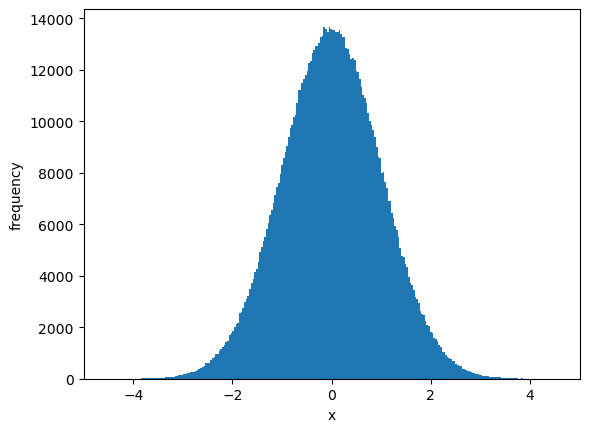

In [4]:
import numpy as np
import matplotlib.pyplot as plt
rand = np.random.randn(1000000)
plt.hist(rand, bins=300)
plt.xlabel('x')
plt.ylabel('frequency')
plt.xlim(-5, 5)
plt.show()

In [34]:
init   = [1.0]
t_span = [0.0,5.0]
t_eval = np.linspace(*t_span,100) # time for sampling
def decay(t,x): return -x
sol = solve_ivp(decay,t_span,init,method='RK45',t_eval=t_eval,dense_output=True)
print(sol.y)
print(sol.sol)

[[1.         0.95074912 0.90392389 0.85937747 0.81698573 0.77665955
  0.73831158 0.70185623 0.66720968 0.6342899  0.60301661 0.5733113
  0.54509725 0.51829948 0.4928448  0.46866177 0.44568076 0.42383386
  0.40305497 0.38327973 0.36444556 0.34649815 0.32941692 0.31316825
  0.29771624 0.28302584 0.26906282 0.25579375 0.24318606 0.23120797
  0.21982854 0.20901764 0.19874596 0.18898503 0.17970718 0.17088558
  0.16249421 0.15450787 0.14690245 0.13966247 0.13277453 0.1262236
  0.11999496 0.11407427 0.1084475  0.10310097 0.09802134 0.09319561
  0.08861111 0.08425553 0.08011687 0.07618349 0.07244407 0.06888767
  0.06550363 0.06228168 0.05921338 0.0562938  0.0535167  0.05087593
  0.04836547 0.04597943 0.04371208 0.04155783 0.03951122 0.03756692
  0.03571978 0.03396475 0.03229693 0.03071159 0.02920409 0.02776998
  0.02640492 0.02510485 0.02386741 0.02269019 0.02157061 0.02050616
  0.01949438 0.01853285 0.01761924 0.01675125 0.01592666 0.01514329
  0.01439903 0.01369183 0.01301968 0.01238065 0.01